# NMF

- [信号処理論特論(東大の講義資料)](https://www.sp.ipc.i.u-tokyo.ac.jp/~saruwatari/SP-Grad2018_02.pdf)
- [非負値行列因子ぶんんかい](https://www.jstage.jst.go.jp/article/sicejl/51/9/51_835/_pdf)
- [非負値行列因子分解 NMF の基礎とデータ／信号解析への応用](http://www.kecl.ntt.co.jp/icl/signal/sawada/mypaper/829-833_9_02.pdf)

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import NMF

In [3]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [5]:
# 使うデータは1036冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_1124.csv'

In [6]:
# pandas dataframeとして読み込む
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.025661,0.000000,0.054238,0.066828,0.170504,0.276141,0.331507,0.199721,0.145354,0.078378,...,0.730720,0.769252,0.744509,0.796472,0.747293,0.633655,0.644652,0.587357,0.710778,1.000000
19,0.582563,0.548885,0.555228,0.577744,0.582888,0.640445,0.639444,0.669647,0.633042,0.589699,...,0.581338,0.537401,0.493915,0.504167,0.462203,0.416233,0.410606,0.407270,0.372276,0.337727
24,0.558150,0.573397,0.559897,0.556415,0.527930,0.403733,0.370236,0.465665,0.523025,0.457648,...,0.028671,0.000000,0.009338,0.099273,0.117307,0.078283,0.066041,0.078662,0.093908,0.292288
30,0.630050,0.571001,0.543094,0.548430,0.484186,0.561365,0.504428,0.539505,0.428540,0.503674,...,0.265228,0.422052,0.512738,0.577317,0.593348,0.557535,0.642939,0.603872,0.603872,0.551362
41,0.911461,1.000000,0.947067,0.883412,0.842882,0.885247,0.841734,0.750502,0.746091,0.763377,...,0.377716,0.371480,0.431062,0.443728,0.395934,0.444922,0.424034,0.525714,0.572375,0.650717


In [9]:
# スコアデータをnumpy形式に変換
scores = score_df.to_numpy()
scores.shape

(1149, 100)

In [10]:
# n_components:9で実施
nmf = NMF(n_components=9)
nmf.fit(score_df)
nmf_w = nmf.transform(score_df)

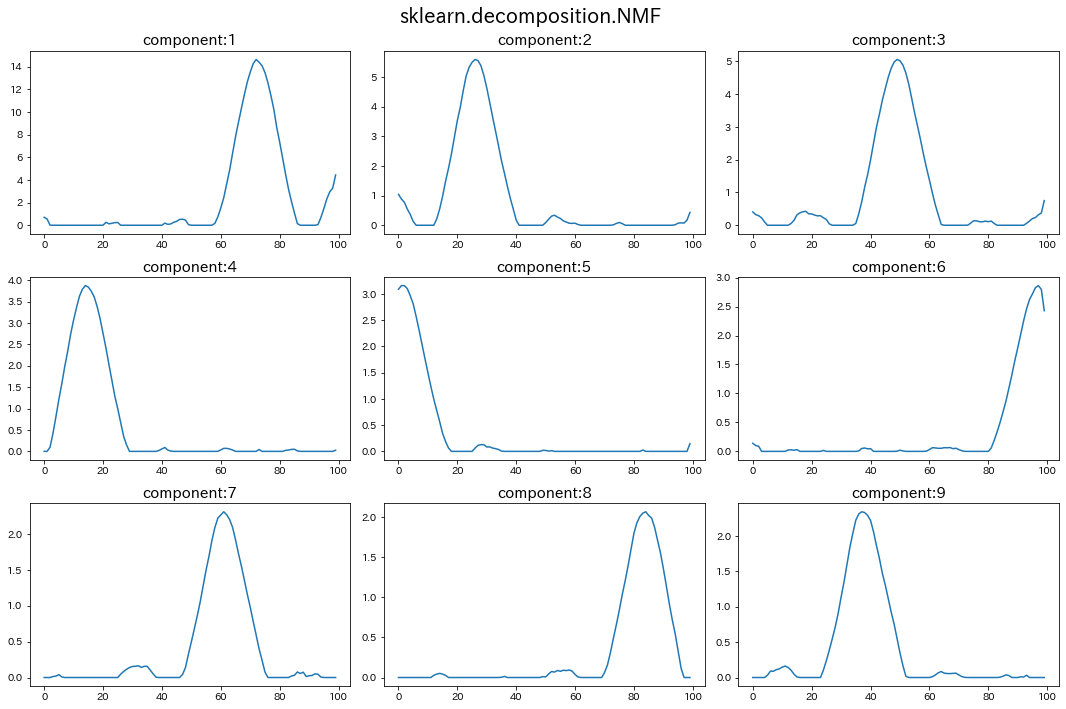

In [11]:
# 視覚化
plt.figure(figsize=(15, 10))
plt.suptitle('sklearn.decomposition.NMF', fontsize=20)
for i in np.arange(len(nmf.components_)):
    ax = plt.subplot(3, 3, i+1)
    ax.set_title(f'component:{i+1}', fontsize=15)
    ax.plot(nmf.components_[i])
plt.tight_layout()
plt.show()

以降のコードは色々とお試し中のもの．

In [59]:
for i in range(9):
    score_df['C'+f'{i+1}'.zfill(2)] = 0
    # print('c'+f'{i}'.zfill(2))

score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S99,C01,C02,C03,C04,C05,C06,C07,C08,C09
13,0.791536,0.737968,0.829343,0.794293,0.724665,0.707668,0.620669,0.607199,0.584499,0.626389,...,0.736535,0,0,0,0,0,0,0,0,0
24,0.749562,0.727724,0.721075,0.648729,0.764811,0.627247,0.634754,0.640822,0.792777,0.844474,...,0.933473,0,0,0,0,0,0,0,0,0
30,0.473785,0.473785,0.652944,0.622040,0.663769,0.799352,0.982744,0.966812,0.851591,0.907304,...,0.517892,0,0,0,0,0,0,0,0,0
41,0.900899,0.952689,1.000000,0.928408,0.802310,0.760143,0.699925,0.759109,0.660739,0.726829,...,0.459209,0,0,0,0,0,0,0,0,0
47,0.742317,0.836033,0.890097,0.911625,0.967501,0.967501,0.972570,0.982321,1.000000,0.929571,...,0.023454,0,0,0,0,0,0,0,0,0


In [60]:
component_cols = {0: 'C01', 1: 'C02', 2: 'C03', 3: 'C04', 4: 'C05',
                  5: 'C06', 6: 'C07', 7: 'C08', 8: 'C09'}

In [112]:
n = len(nmf_w)
n = 2

for i in np.arange(n):
    print(f'--- idx: {i} --- ')
    # 係数
    print(np.round(nmf_w[i], 2), ': nmf_w')
    # 係数を大きい順に並び替え，index表示
    w_idx = np.argsort(nmf_w[i])[::-1]
    print(w_idx, ': argsort[::-1]')
    # 係数の比率
    w_rate = nmf_w[i]/nmf_w[i].sum()
    print(np.round(w_rate, 2), ': nmf_w rate')
    w_rate_desc = np.sort(nmf_w[i]/nmf_w[i].sum())[::-1]
    print(np.round(w_rate_desc,2), ': nmf_w rate(desc)')
    # 係数の累積比率
    accum_rate = [w_rate_desc[:i].sum() for i in np.arange(1,len(w_rate_desc)+1)]
    print(np.round(accum_rate,2), ': accumurate rate')
    # 累積比率が８割を超える箇所を把握
    accum_rate_flg = []
    flg = True
    for e in accum_rate:
        accum_rate_flg.append(flg)
        if e >= 0.8:
            flg = False
    print(accum_rate_flg, ': > 0.8 flg')
    print(np.array2string(w_idx[accum_rate_flg], separator=','))
    print(','.join(map(str, w_idx[accum_rate_flg])))
    # Data Frameに書き込み
    for j in component_cols:
        print(component_cols[j], np.round(w_rate[j], 2))
        score_df.iloc[i][component_cols[j]] = w_rate[j]
    # break

--- idx: 0 --- 
[0.01 0.09 0.   0.2  0.   0.11 0.03 0.6  0.31] : nmf_w
[7 8 3 5 1 6 0 4 2] : argsort[::-1]
[0.01 0.07 0.   0.15 0.   0.08 0.02 0.45 0.23] : nmf_w rate
[0.45 0.23 0.15 0.08 0.07 0.02 0.01 0.   0.  ] : nmf_w rate(desc)
[0.45 0.68 0.82 0.9  0.97 0.99 1.   1.   1.  ] : accumurate rate
[True, True, True, False, False, False, False, False, False] : > 0.8 flg
[7,8,3]
7,8,3
C01 0.01
C02 0.07
C03 0.0
C04 0.15
C05 0.0
C06 0.08
C07 0.02
C08 0.45
C09 0.23
--- idx: 1 --- 
[0.03 0.07 0.01 0.19 0.06 0.1  0.   0.04 0.43] : nmf_w
[8 3 5 1 4 7 0 2 6] : argsort[::-1]
[0.03 0.08 0.01 0.2  0.06 0.11 0.   0.04 0.46] : nmf_w rate
[0.46 0.2  0.11 0.08 0.06 0.04 0.03 0.01 0.  ] : nmf_w rate(desc)
[0.46 0.67 0.78 0.86 0.92 0.96 0.99 1.   1.  ] : accumurate rate
[True, True, True, True, False, False, False, False, False] : > 0.8 flg
[8,3,5,1]
8,3,5,1
C01 0.03
C02 0.08
C03 0.01
C04 0.2
C05 0.06
C06 0.11
C07 0.0
C08 0.04
C09 0.46


/tmp/ipykernel_4115118/2571106004.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.iloc[i][component_cols[j]] = w_rate[j]


In [116]:
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S99,C01,C02,C03,C04,C05,C06,C07,C08,C09
13,0.791536,0.737968,0.829343,0.794293,0.724665,0.707668,0.620669,0.607199,0.584499,0.626389,...,0.736535,0,0,0,0,0,0,0,0,0
24,0.749562,0.727724,0.721075,0.648729,0.764811,0.627247,0.634754,0.640822,0.792777,0.844474,...,0.933473,0,0,0,0,0,0,0,0,0
30,0.473785,0.473785,0.652944,0.622040,0.663769,0.799352,0.982744,0.966812,0.851591,0.907304,...,0.517892,0,0,0,0,0,0,0,0,0
41,0.900899,0.952689,1.000000,0.928408,0.802310,0.760143,0.699925,0.759109,0.660739,0.726829,...,0.459209,0,0,0,0,0,0,0,0,0
47,0.742317,0.836033,0.890097,0.911625,0.967501,0.967501,0.972570,0.982321,1.000000,0.929571,...,0.023454,0,0,0,0,0,0,0,0,0


In [67]:
print(np.round(nmf_w[0],2))
nmf_w_idx = np.argsort(nmf_w[0])[::-1]
print(nmf_w_idx)
nmf_w_rate_desc = np.sort(nmf_w[0]/nmf_w[0].sum())[::-1]
print(np.round(nmf_w_rate_desc,2))
nmf_w_rate_accum = [nmf_w_rate_desc[:i].sum() for i in np.arange(1,len(nmf_w_rate_desc)+1)]
print(np.round(nmf_w_rate_accum,2))

nmf_w_rate_accum_flg = []
flg = True
for e in nmf_w_rate_accum:
    nmf_w_rate_accum_flg.append(flg)
    if e >= 0.8:
        flg = False
print(nmf_w_rate_accum_flg)

for i, flg in enumerate(nmf_w_rate_accum_flg):
    if flg:
        print(nmf_w_idx[i], np.round(nmf_w_rate_desc[i],2))

[0.01 0.09 0.   0.2  0.   0.11 0.03 0.6  0.31]
[7 8 3 5 1 6 0 4 2]
[0.45 0.23 0.15 0.08 0.07 0.02 0.01 0.   0.  ]
[0.45 0.68 0.82 0.9  0.97 0.99 1.   1.   1.  ]
[True, True, True, False, False, False, False, False, False]
7 0.45
8 0.23
3 0.15


<BarContainer object of 9 artists>

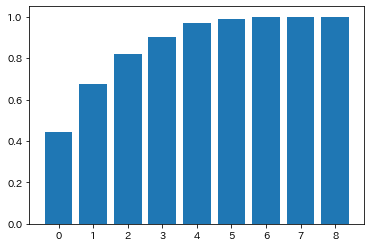

In [43]:
plt.bar(np.arange(len(nmf_w_rate_accum)), nmf_w_rate_accum, tick_label=[i for i in range(len(nmf_w_rate_accum))])

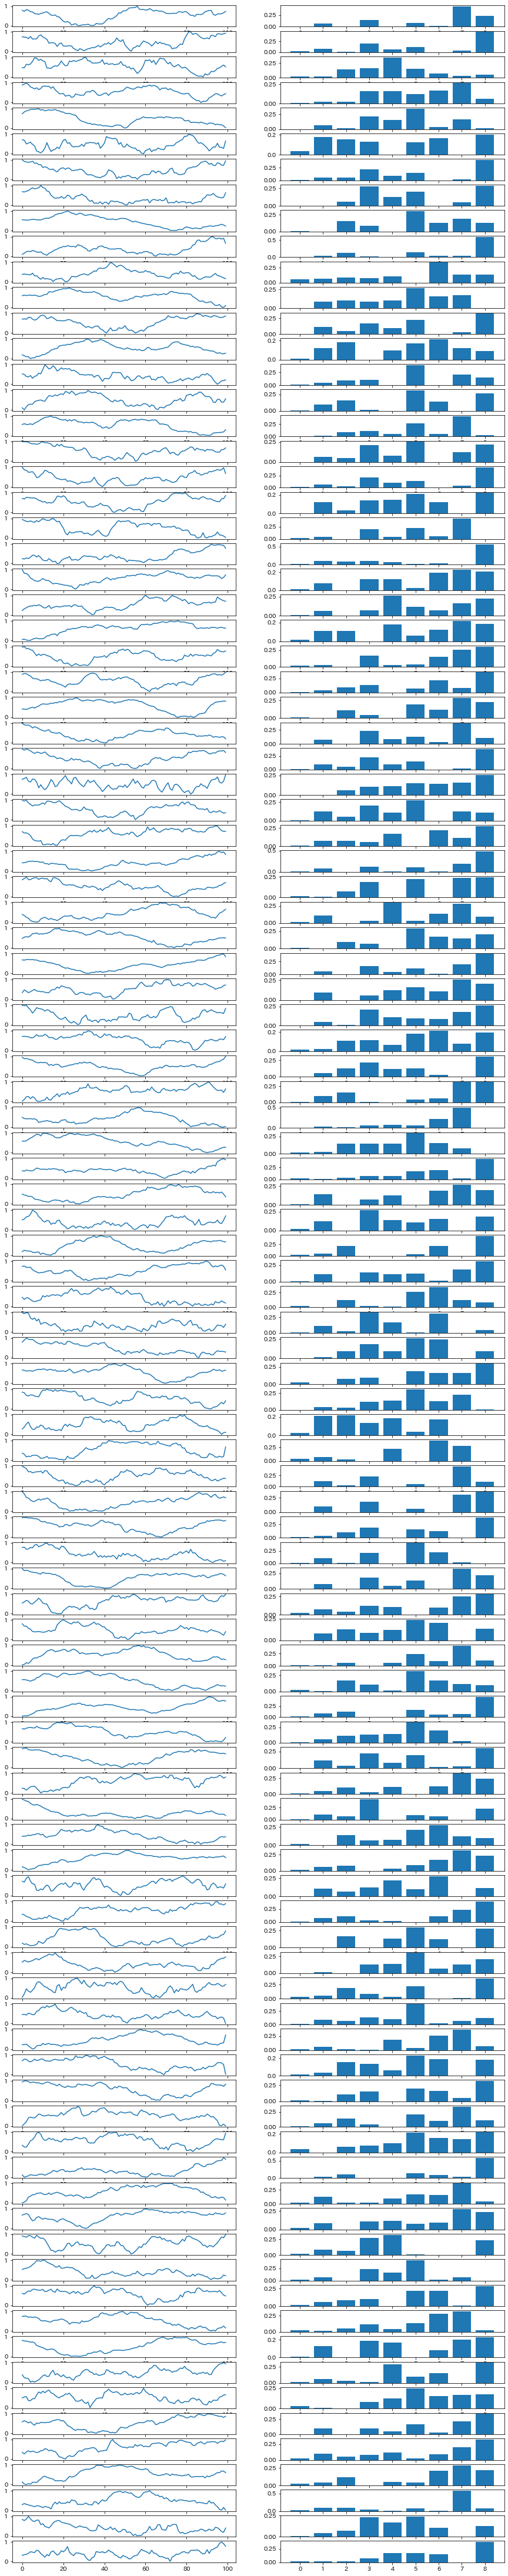

In [44]:
n = 100 #nmf_w.shape[0]
plt.figure(figsize=(15, 0.8*n))
accumu_w = []
for i in range(n):
    sort = np.argsort(nmf_w[i])[::-1]
    sort_rate = np.round(np.sort(nmf_w[i]/nmf_w[i].sum())[::-1],2)
    sort_rate_acc = []
    tmp = 0
    for j in np.arange(len(sort)):
        tmp += sort_rate[j]
        sort_rate_acc.append(np.round(tmp,2))
    # print(sort, sort_rate, sort_rate_acc)

    ax1 = plt.subplot(n, 2, 2*i+1)
    ax1.plot(scores[i])
    ax2 = plt.subplot(n, 2, 2*i+2)
    ax2.bar(np.arange(len(sort_rate)), nmf_w[i]/nmf_w[i].sum(), tick_label=[i for i in range(len(sort_rate))])

    # break

<BarContainer object of 9 artists>

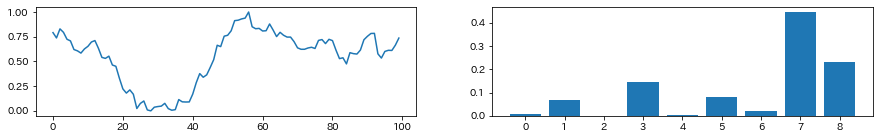

In [38]:
plt.figure(figsize=(15, 2))
ax1 = plt.subplot(1, 2, 1)
# ax1.plot(score_df.iloc[0])
ax1.plot(scores[0])
ax2 = plt.subplot(1, 2, 2)
ax2.bar(np.arange(len(sort_rate)), nmf_w[0]/nmf_w[0].sum(), tick_label=[i for i in range(len(sort_rate))])

In [15]:
nmf_w[0]/nmf_w[0].sum()

array([0.00910512, 0.06703954, 0.        , 0.14585031, 0.00163297,
       0.07961549, 0.02111711, 0.44523258, 0.23040687])

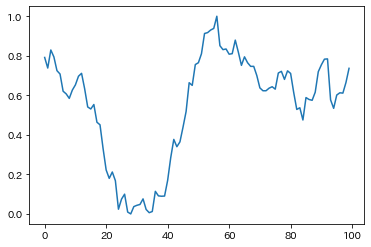

In [16]:
plt.plot(scores[0])